In [1]:
# Google Driveと接続を行います。これを行うことで、Driveにあるデータにアクセスできるようになります。
# 下記セルを実行すると、Googleアカウントのログインを求められますのでログインしてください。
from google.colab import drive
drive.mount('/content/drive')

# 作業フォルダへの移動を行います。
# もしアップロードした場所が異なる場合は作業場所を変更してください。
import os
os.chdir('/content/drive/MyDrive/ai_app_dev/3章') #ここを変更

Mounted at /content/drive


## 画風変換AIへの入力データを知ろう

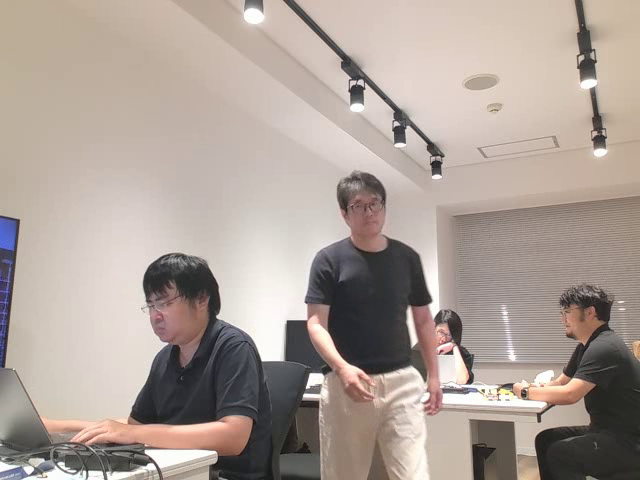

In [2]:
import cv2
from google.colab.patches import cv2_imshow
tg_img = cv2.imread('data/input/img01.png')
cv2_imshow(tg_img)

In [3]:
style_img = cv2.imread('data/input/style_img02.jpg')
cv2_imshow(style_img)

Output hidden; open in https://colab.research.google.com to view.

In [4]:
print(tg_img.shape)
print(style_img.shape)

(480, 640, 3)
(1002, 1280, 3)


In [5]:
tg_img = cv2.cvtColor(tg_img, cv2.COLOR_BGR2RGB)
ratio = 512 / max(tg_img.shape[:2])
tg_img = cv2.resize(tg_img, dsize=None,fx=ratio, fy=ratio)
print(ratio)
print(tg_img.shape)

0.8
(384, 512, 3)


In [6]:
print(tg_img)
tg_img = tg_img / 255.0
print(tg_img)

[[[188 173 151]
  [188 173 151]
  [188 173 151]
  ...
  [202 184 163]
  [202 184 163]
  [202 184 163]]

 [[188 173 151]
  [188 173 151]
  [188 173 151]
  ...
  [202 184 163]
  [202 184 163]
  [202 184 163]]

 [[188 173 151]
  [188 173 151]
  [188 173 151]
  ...
  [202 184 163]
  [202 184 163]
  [202 184 163]]

 ...

 [[138 141 159]
  [142 145 163]
  [151 154 172]
  ...
  [ 46  46  41]
  [ 46  46  41]
  [ 46  46  41]]

 [[181 184 197]
  [190 193 206]
  [192 195 208]
  ...
  [ 44  44  39]
  [ 44  44  39]
  [ 44  44  39]]

 [[203 206 215]
  [183 187 196]
  [168 171 182]
  ...
  [ 43  43  38]
  [ 43  43  38]
  [ 43  43  38]]]
[[[0.7372549  0.67843137 0.59215686]
  [0.7372549  0.67843137 0.59215686]
  [0.7372549  0.67843137 0.59215686]
  ...
  [0.79215686 0.72156863 0.63921569]
  [0.79215686 0.72156863 0.63921569]
  [0.79215686 0.72156863 0.63921569]]

 [[0.7372549  0.67843137 0.59215686]
  [0.7372549  0.67843137 0.59215686]
  [0.7372549  0.67843137 0.59215686]
  ...
  [0.79215686 0.7215686

In [7]:
import numpy as np
import tensorflow as tf
tg_img = tg_img.astype(np.float32)
tg_img = tg_img[tf.newaxis, :]
print(tg_img.shape)

(1, 384, 512, 3)


## 画風変換AIを実行しよう

In [8]:
tg_img = cv2.imread('data/input/img01.png')
style_img = cv2.imread('data/input/style_img02.jpg')

tg_img = cv2.cvtColor(tg_img, cv2.COLOR_BGR2RGB)
ratio = 512 / max(tg_img.shape[:2])
tg_img = cv2.resize(tg_img, dsize=None,fx=ratio, fy=ratio)

tg_img = tg_img / 255.0
tg_img = tg_img.astype(np.float32)
tg_img = tg_img[tf.newaxis, :]

style_img = cv2.cvtColor(style_img, cv2.COLOR_BGR2RGB)
ratio = 512 / max(style_img.shape[:2])
style_img = cv2.resize(style_img, dsize=None,fx=ratio, fy=ratio)

style_img = style_img / 255.0
style_img = style_img.astype(np.float32)
style_img = style_img[tf.newaxis, :]

In [9]:
import tensorflow_hub as hub
module = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

In [10]:
outputs = module(tf.constant(tg_img), tf.constant(style_img))
outputs

[<tf.Tensor: shape=(1, 384, 512, 3), dtype=float32, numpy=
 array([[[[0.41148844, 0.5235551 , 0.7372357 ],
          [0.47341597, 0.56337965, 0.7942732 ],
          [0.46573043, 0.5828243 , 0.785872  ],
          ...,
          [0.45372686, 0.57818913, 0.7302431 ],
          [0.48059705, 0.6232527 , 0.7661912 ],
          [0.42668197, 0.5655108 , 0.7163551 ]],
 
         [[0.44837832, 0.52916133, 0.7538826 ],
          [0.505905  , 0.57000166, 0.8096041 ],
          [0.56232834, 0.6410175 , 0.82868886],
          ...,
          [0.61101246, 0.68720776, 0.8179953 ],
          [0.62945443, 0.7203504 , 0.8420721 ],
          [0.5841439 , 0.6731077 , 0.81044346]],
 
         [[0.42819434, 0.549147  , 0.73721457],
          [0.49021032, 0.6015559 , 0.7913334 ],
          [0.6129247 , 0.7142854 , 0.8464159 ],
          ...,
          [0.5409313 , 0.66047007, 0.767295  ],
          [0.5491543 , 0.68177456, 0.7939602 ],
          [0.4903723 , 0.6220406 , 0.7449458 ]],
 
         ...,
 
       

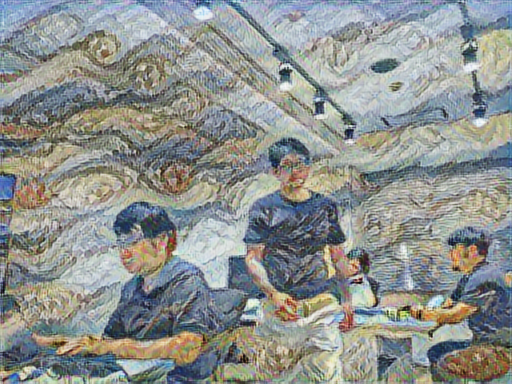

In [11]:
output_img = outputs[0][0]
output_img = output_img.numpy()
output_img = output_img * 255
output_img = output_img.astype('uint8')
output_img = cv2.cvtColor(output_img, cv2.COLOR_RGB2BGR)
cv2_imshow(output_img)

## アニメ風変換AIを見てみよう

In [12]:
from PIL import Image
tg_img = cv2.imread('data/input/img02.png')
print(tg_img.shape)

tg_img = cv2.cvtColor(tg_img, cv2.COLOR_BGR2RGB)
tg_img = Image.fromarray(tg_img)

(480, 640, 3)


In [13]:
print(tg_img.mode)
print(tg_img.size)

RGB
(640, 480)


In [14]:
import torch

model = torch.hub.load("bryandlee/animegan2-pytorch:main", "generator", pretrained="face_paint_512_v2")
face2paint = torch.hub.load("bryandlee/animegan2-pytorch:main", "face2paint")

/usr/local/lib/python3.10/dist-packages/torch/hub.py:286: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/bryandlee/animegan2-pytorch/zipball/main" to /root/.cache/torch/hub/main.zip
Downloading: "https://github.com/bryandlee/animegan2-pytorch/raw/main/weights/face_paint_512_v2.pt" to /root/.cache/torch/hub/checkpoints/face_paint_512_v2.pt
100%|██████████| 8.20M/8.20M [00:00<00:00, 88.1MB/s]
Using cache found in /root/.cach

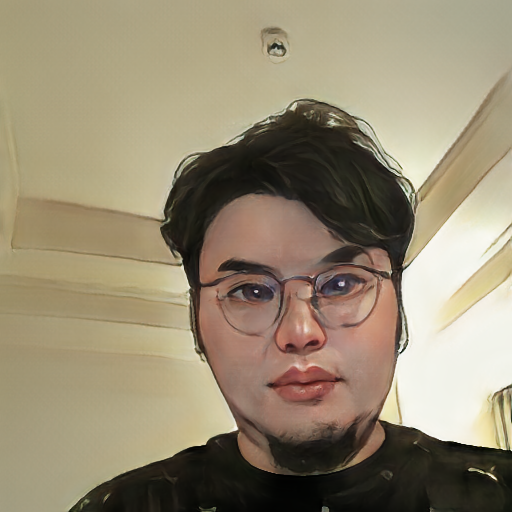

In [15]:
out = face2paint(model, tg_img, size=512)
out